Descriptive Statistics
=====

Some of the code contained within this notebook is from Ch. 5 of *Data Science from Scratch* by J. Grus.



Imagine someone gives you a set of data.  Perhaps it is data on friendships (e.g., how many a friends a person has, a list of friends for each person, etc.)  You are asked to say *something* about the data.  In otherwords, you need to summarize the data or provide some sort of summary description about characteristics of the data.  Exactly how you do this will likely depend on your needs and what you are trying to communicate.  One way to summarize and describe your data is making use of [descriptive statistics](https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291).

Consider some data taken from a survey of the residents of *fooville*.  It represents the self-reported number of friends by each resident.


In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


1) How might we get a sense of the overall friendliness of *fooville*?  

<BarContainer object of 101 artists>

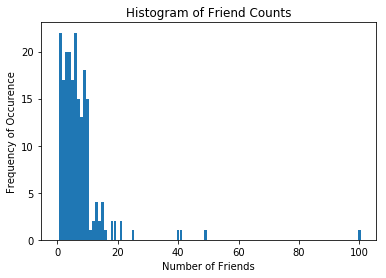

In [4]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

friends_counts = Counter(num_friends)

xs = range(101)
ys = [friends_counts[i] for i in xs]

plt.title("Histogram of Friend Counts")
plt.xlabel("Number of Friends")
plt.ylabel("Frequency of Occurence")
plt.bar(xs, ys)


We would could consider the total number of friendships or the maximum or minimum number of friendships.

In [5]:
### Solution ###

total_num_friendships = sum(num_friends)
friendliest_num_friends = max(num_friends)
lonliest_num_friends = min(num_friends)

print "Total number of friendships:", total_num_friendships, 
print "Friend count of the friendliest resident:", friendliest_num_friends,
print "Friend count of the lonliest resident:", lonliest_num_friends

Total number of friendships: 1496 Friend count of the friendliest resident: 100 Friend count of the lonliest resident: 1


## Central Tendencies

The **mean**, or average, is one way to describe the central tendencies (i.e., "middle") of a dataset.  More formally, mean is defined as the sum of values in the dataset divided by the number of values.   

In [7]:
from __future__ import division

def mean(x):
    return sum(x) / len(x)

print "Average number of friends: ", mean(num_friends)

Average number of friends:  7.33333333333


The **median** is another descriptor of the center of the dataset.  It is the middlemost value, or average of the two middlemost values, in the sorted data.

In [8]:
def median(x):
    return 0

In [9]:
### Solution ###
from __future__ import division

def mean(x): 
    return sum(x) / len(x)

def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2


2) Notice what happens to the mean and median incomes in *fooville* after the arrival of two new residents.

In [10]:
salaries = [25000, 37000, 15000, 42000, 19000, 65000, 98000, 100555, 50000]

print "Mean and median salary of fooville:", mean(salaries), median(salaries)

salaries.append(1250000)
salaries.append(45000)

print "Mean and median salary of fooville:", mean(salaries), median(salaries)

Mean and median salary of fooville: 50172.7777778 42000
Mean and median salary of fooville: 158777.727273 45000


As an exention of the median, we could consider **quantiles**.  A quantile indicates what value in the data represents a certain percentile in data.  As an example, if the 75th quantile was 9 then 75% of the data is less than or equal to 9  

The median is the same as the 50th percentile.  

In [11]:
def quantile(x, p):
    """retruns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print quantile(num_friends, 0.10)
print quantile(num_friends, 0.75)

1
9


The most common value (or values) in a data set is called the **mode**.  

In [12]:
from collections import Counter

def mode(x):
    """return a list, might be more than one mode"""
    ### Solution ###
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

print mode(num_friends)

[1, 6]


## Dispersion

While the mean and median describe the *center* of the data, we may be interested in how spread out the data is.

3) What seems like a reasonable way to measure dispersion?  


In [13]:
### Solution ###

def rnge(x):
    return max(x) - min(x)

print rnge(num_friends)

99


4) What drawbacks do you see with this approach?

In [14]:
### Solution ###

num_enemies = [1, 3, 5, 3, 2]
print rnge(num_enemies)

num_enemies.extend([0, 200])
print rnge(num_enemies)



4
200


The **variance** is another measure of dispersion.  

In [15]:
import math

def variance(x):
    """Formulation only makes sense if x has at least 2 elements"""
    n = len(x)
    
    if n < 2:
        return 0
    
    x_bar = mean(x)
    deviations = [x_i - x_bar for x_i in x]
    squared_deviations = [x_i ** 2 for x_i in deviations]
    
    return sum(squared_deviations) / (n - 1)   # N.B. dividing by n-1 since we are viewing x as a sample  

def standard_deviation(x):
    return math.sqrt(variance(x))

print variance(num_friends), standard_deviation(num_friends)

81.5435139573 9.03014473623


5) What is this telling us?  Do you think this measure will be robust to outliers?

In [16]:
### Solution ###
num_enemies = [1, 3, 5, 3, 2]
print standard_deviation(num_enemies)

num_enemies.extend([0, 200])
print standard_deviation(num_enemies)

1.48323969742
74.7280784865


Another measure of dispersion is the interquartile range

In [17]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print interquartile_range(num_friends)

num_enemies = [1, 3, 5, 3, 2]
print interquartile_range(num_enemies)

num_enemies.extend([0, 200])
print interquartile_range(num_enemies)


6
1
4


## Correlation

So far, we have limited ourselves to a dataset of values of one type.  What if we had a pair of values, or two datasets that were linked?  

Let's assume that the data that we have on the number of friends is for users of the DataSciencester website.  We also have the average number of minutes the user spends on the website.  Is there a relationship between the two?

In [18]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(x, y):
    n = len(x)    
    de_mean_x = [x_i - mean(x) for x_i in x]
    de_mean_y = [y_i - mean(y) for y_i in y]
    
    return dot(de_mean_x, de_mean_y) / (n - 1)
    
print covariance(num_friends, daily_minutes)


22.4254351396


The **covariance** looks at how the two variables vary from their respect means in tandem.  The dot product sums the products of the two lists.  Think about what happens to the products when they deviate the same direction (either above or below the means) or in opposite directions? 

The **correlation** divides by the standard deviations of each variable and gives a unitless value between -1 and 1.  0 indicates no correlation and -1 or 1 a negative or positive correlation, respectively.   

In [19]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
print correlation(num_friends, daily_minutes)

0.247369573665


Let's plot the data as well (and we probably should have done this first).

Text(0,0.5,'minutes per day')

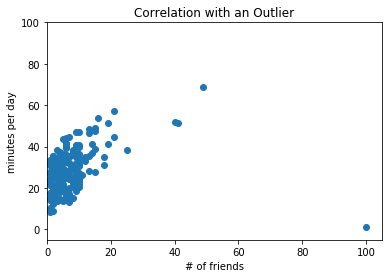

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(num_friends, daily_minutes)
plt.axis([0,105,-5,100])
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")

Whoa!  There seems to be one value that is way out of place.  How about we remove it !?!

0.573679211567


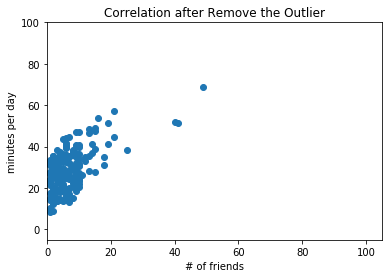

In [21]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)
plt.axis([0,105,-5,100])
plt.title("Correlation after Remove the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")

print correlation(num_friends_good, daily_minutes_good)

## Correlation vs Causation

6) What can we say then about the friendliness of users and the time spend on the website?

Finally, when looking at samples, we should be wary of any cofounding variables.  If possible, we need to make sure that our data is coming for samples that are not somehow biased (i.e., a cofounding variable).  Otherwise, the relationship we see may have to do with something else.  